### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

The final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Using the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Text(0.5, 1.0, 'Drop NaN')

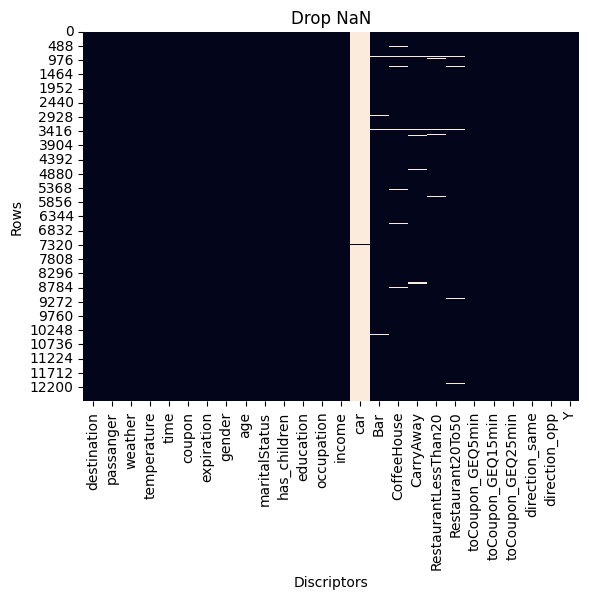

In [7]:
# Creating a heatmap of missing data
sns.heatmap(data.isnull(), cbar=False)
plt.xlabel('Discriptors')
plt.ylabel('Rows')
plt.title('Drop NaN')


3. Deciding what to do about your missing data -- drop, replace, other...

In [18]:
#Missing data can significantly affect the overall analysis. This approach can help maintain the integrity of the dataset.
data['expiration'].value_counts()

24    7091
2     5593
Name: expiration, dtype: int64

In [22]:
data["expiration"] = data["expiration"].astype(str)
data["expiration"] = data["expiration"].str.replace("1d", "24")
data["expiration"] = data["expiration"].str.replace("2h", "2")


In [23]:
data["expiration"]=pd.to_numeric(data["expiration"])

In [24]:
#Look at the data attributes that have the "$" and "-" characters. This will help us understand the data better and analyze it as a numerical value.
data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [26]:
#Analysis of the coffee house column. This will help us understand the data better and analyze it as a numerical value.
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [27]:
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("never","0")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("less1","1")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("1~3","2")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("4~8","6")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("gt8","9")

In [28]:
data["CoffeeHouse"]=pd.to_numeric(data["CoffeeHouse"])

In [29]:
#Analysis of the Bar column. This will help us understand the data better and analyze it as a numerical value.
data['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [30]:
data["Bar"]=data["Bar"].str.replace("never","0")
data["Bar"]=data["Bar"].str.replace("less1","1")
data["Bar"]=data["Bar"].str.replace("1~3","2")
data["Bar"]=data["Bar"].str.replace("4~8","6")
data["Bar"]=data["Bar"].str.replace("gt8","9")

In [31]:
data["Bar"]=pd.to_numeric(data["Bar"])

In [32]:
#Analysis of the RestaurantLessThan20 column. This will help us understand the data better and analyze it as a numerical value.
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [33]:
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("never","0")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("less1","1")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("1~3","2")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("4~8","6")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("gt8","9")

In [34]:
data["RestaurantLessThan20"]=pd.to_numeric(data["RestaurantLessThan20"])

In [35]:
#Analysis of the Restaurant20To50 column. This will help us understand the data better and analyze it as a numerical value.
data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [36]:
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("never","0")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("less1","1")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("1~3","2")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("4~8","6")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("gt8","9")

In [37]:
data["Restaurant20To50"]=pd.to_numeric(data["Restaurant20To50"])

In [44]:
#Analysis of the "below21" and the "50plus" columns. This will help us understand the data better and analyze it as a numerical value.
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [45]:
data["age"]=data["age"].str.replace("50plus","51")
data["age"]=data["age"].str.replace("below21","20")

In [46]:
data["age"]=pd.to_numeric(data["age"])

In [43]:
#Analysis of the CarryAway column. This will help us understand the data better and analyze it as a numerical value.
data['CarryAway'].value_counts()

2.0    4672
6.0    4258
1.0    1856
9.0    1594
0.0     153
Name: CarryAway, dtype: int64

In [39]:
data["CarryAway"]=data["CarryAway"].str.replace("never","0")
data["CarryAway"]=data["CarryAway"].str.replace("less1","1")
data["CarryAway"]=data["CarryAway"].str.replace("1~3","2")
data["CarryAway"]=data["CarryAway"].str.replace("4~8","6")
data["CarryAway"]=data["CarryAway"].str.replace("gt8","9")

In [40]:
data["CarryAway"]=pd.to_numeric(data["CarryAway"])

4. What proportion of the total observations chose to accept the coupon? 



In [47]:
ans41=(data.query("Y==1")["Y"].count())/len(data["Y"])
print(ans41)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

In [49]:
totalcoupon=data["coupon"].value_counts()
totalcoupon = totalcoupon.to_frame()
totalcoupon.columns = ['totalcoupon1']
totalcoupon.index.names = ['Namecoupon']
totalcoupon['Namecoupon'] = totalcoupon.index

C:\Users\n8mau\AppData\Local\Temp\ipykernel_44700\2480392408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Namecoupon", y="totalcoupon1", data=totalcoupon, edgecolor="black", palette="Set2")


FileNotFoundError: [Errno 2] No such file or directory: 'DriveThruML/images/distributioncoupons.png'

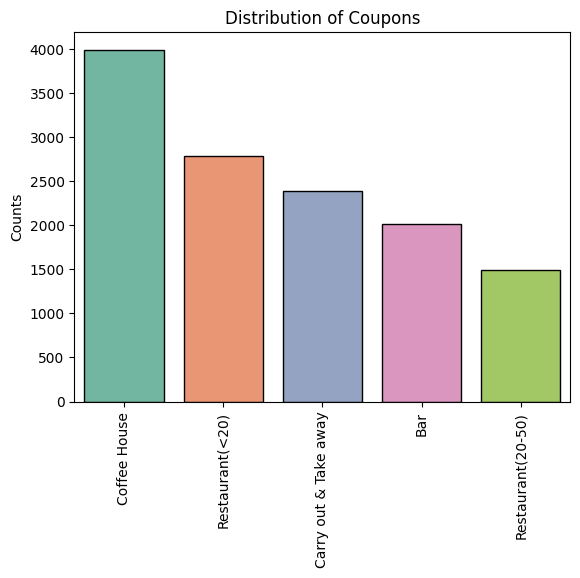

In [53]:
#Plot the findings
sns.barplot(x="Namecoupon", y="totalcoupon1", data=totalcoupon, edgecolor="black", palette="Set2")
plt.title('Distribution of Coupons')
#Set x-axis label
plt.xlabel('')
#Set y-axis label
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.savefig('DriveThruML/images/distributioncoupons.png')

6. Use a histogram to visualize the temperature column.

FileNotFoundError: [Errno 2] No such file or directory: 'DriveThruML/images/histogramtemperatures.png'

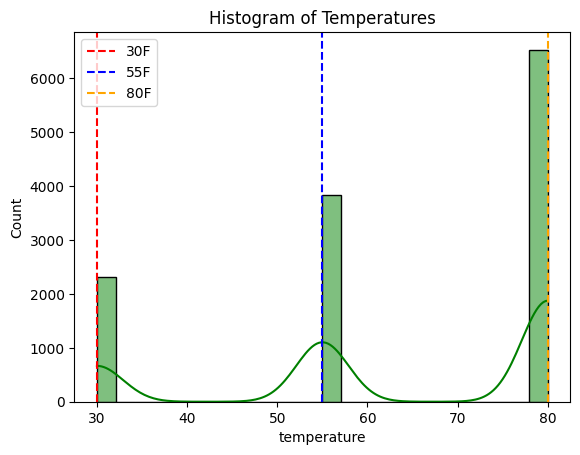

In [58]:
sns.histplot(data['temperature'], color='green', kde=True)
plt.axvline(x=30, color='red', linestyle='--', label='30F')
plt.axvline(x=55, color='blue', linestyle='--', label='55F')
plt.axvline(x=80, color='orange', linestyle='--', label='80F')
plt.title('Histogram of Temperatures')
plt.legend()
plt.savefig('DriveThruML/images/histogramtemperatures.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [59]:
df1=pd.DataFrame(data.query('coupon=="Bar"')["coupon"].values, data.query('coupon=="Bar"')["coupon"].index,columns=["Bar"])

2. What proportion of bar coupons were accepted?


Answer: 0.41001487357461575

In [60]:
bar_coupons = data[data['coupon'] == 'Bar']
accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1]
proportion_accepted = len(accepted_bar_coupons) / len(bar_coupons)
proportion_accepted


0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Answer: 56% from those who visited a bar <3 times and 62% for those who went more than 3 times.

In [77]:
bar_3_or_fewer = data[data['Bar'] <= 3]
bar_more_than_3 = data[data['Bar'] > 3]

acceptance_rate_3_or_fewer = bar_3_or_fewer['Y'].mean()
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean()

acceptance_rate_3_or_fewer, acceptance_rate_more_than_3



(0.562051649928264, 0.6224561403508772)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Answer: 13% for drivers who go to the bar and over the age of 25. 43% for all others.

In [73]:
ans2=(data.query("Bar >1 & age>25 & Y==1")["Bar"].dropna().count()/len(data["Bar"].dropna()))
print(ans2)

0.1372346346505526


In [74]:
ans3=(data.query("Y==1")["Bar"].dropna().count()-data.query("Bar >1 & age>25 & Y==1")["Bar"].dropna().count())/len(data["Bar"].dropna())
print(ans3)

0.43166096843444385


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [85]:
ans4=(data.query("Bar >1 & passanger!='Kid(s)' & Y==1")["Bar"].dropna().count()/len(data["Bar"].dropna()))*100
print(ans4)


18.31120298958416


In [86]:
ans5=(data.query("Bar >1 & occupation!='Farming Fishing & Forestry' & Y==1")["Bar"].dropna().count()/len(data["Bar"].dropna()))*100
print(ans5)

19.281227637751453


In [92]:
ans4=(data.query("Bar >1 & passanger!='Kid(s)' & Y==1")["Bar"].dropna().count()/len(data["Bar"].dropna()))*100
ans5=(data.query("Bar >1 & occupation!='Farming Fishing & Forestry' & Y==1")["Bar"].dropna().count()/len(data["Bar"].dropna()))*100
(ans5-ans4)/ans5

0.05030927835051563

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [95]:
ans6=(data.query("Bar>1 & passanger!='Kid(s)'& maritalStatus!='Widowed' & Y==1")["passanger"].count()/len(data["passanger"]))*100
print(ans6)


18.15673289183223


In [94]:
ans7=(data.query("Bar>1 & age<30 & Y==1")["passanger"].dropna().count()/len(data["passanger"]))*100
print(ans7)

11.250394197414066


In [116]:
ans8=(data.query("RestaurantLessThan20>=6 & income<50000 & Y==1")["passanger"].count()/len(data["passanger"]))*100
print(ans8)

TypeError: '<' not supported between instances of 'str' and 'int'

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Coupons are accepted by those people who go to the bar more than once a month, were over the age of 21 and were not widowed. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

C:\Users\n8mau\AppData\Local\Temp\ipykernel_44700\1687853024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Y', data=data, palette=['red', 'blue'])


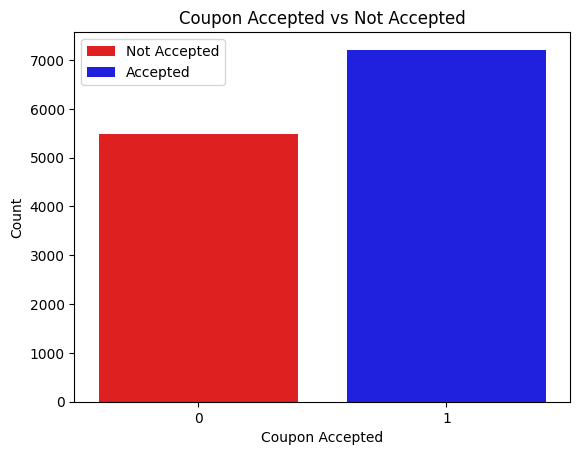

In [121]:
sns.countplot(x='Y', data=data, palette=['red', 'blue'])
plt.xlabel('Coupon Accepted')
plt.ylabel('Count')
plt.title('Coupon Accepted vs Not Accepted')
plt.legend(labels=['Not Accepted', 'Accepted'], loc='upper left')

